In [13]:
import open3d as o3d
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import os
import copy
import pandas as pd
from scipy import interpolate
import math
import time

In [3]:
#newsize=(640,480)
#color=Image.open(r"Data/ILCE_QX1_L/DSC01583.JPG")
#color=color.resize(newsize)
#color.save(r"Data/test.jpg")

color_raw=o3d.io.read_image("Data/test.JPG")
depth_raw=o3d.io.read_image("Data/depth_img/DSC01583.JPG")
#depth_raw = mpimg.imread("Data/depth_txt/DSC01583.txt")

rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, depth_scale=1)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd,o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
#pcd = open3d.geometry.create_point_cloud_from_depth_image(rgbd, pinhole_camera_intrinsic)

# flip the orientation, so it looks upright, not upside-down
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
#o3d.io.write_point_cloud("point.pcd", pcd)
o3d.visualization.draw_geometries([pcd],
                                 zoom=0.05,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [72]:
PCD=np.asarray(pcd.points)
print(np.amax(PCD))
print(np.amin(PCD))
print(PCD)

0.23726984498046694
-0.9843137264251709
[[-0.1789916   0.13417368 -0.29411766]
 [-0.17843138  0.13417368 -0.29411766]
 [-0.17787116  0.13417368 -0.29411766]
 ...
 [ 0.15889823 -0.11986182 -0.26274511]
 [ 0.1593987  -0.11986182 -0.26274511]
 [ 0.15989917 -0.11986182 -0.26274511]]


In [18]:
print(depth)

[[2.8804493  2.92554474 2.97064018 ... 2.75015426 2.72477627 2.69939852]
 [2.93924499 2.96649742 2.9937501  ... 2.77148318 2.75691795 2.74235272]
 [2.99804068 3.00745058 3.01686025 ... 2.79281211 2.78905964 2.78530693]
 ...
 [2.61422348 2.61742616 2.62062883 ... 2.68646812 2.67770028 2.6689322 ]
 [2.57688069 2.59150696 2.60613298 ... 2.66980028 2.64747405 2.62514782]
 [2.53953791 2.56558776 2.59163737 ... 2.65313244 2.61724782 2.5813632 ]]


In [26]:
np.shape(color)

(480, 640, 3)

In [7]:
depth=np.loadtxt(r"Data/depth_txt/DSC01583.txt")

In [19]:
depth_v2=depth*25.5

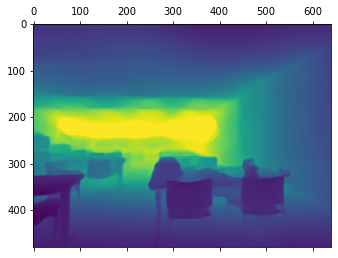

In [20]:
plt.matshow(depth_v2)
plt.show()

In [23]:
depth_map=Image.fromarray(depth_v2)

In [24]:
depth_map.show()

In [17]:
print(np.amax(depth_v2))

19.504199981689453


25.5

In [27]:
depth_map.size

(640, 480)

### To convert depth txt into PIL images

In [41]:
data="Data/depth_txt"
for depthtxt in os.listdir(data):
    if(depthtxt.endswith(".txt")):
        depth=np.loadtxt(data+"/"+depthtxt)
        depth_map=Image.fromarray(depth)
        new_depth = depth_map.convert("L")
        new_depth.save("Data/depth_img/"+depthtxt[:-4]+".JPG","JPG")

In [32]:
print(depthtxt)

DSC01583.txt


In [33]:
print(data+"/"+depthtxt)

Data/depth_txt/DSC01583.txt


In [16]:
open3d.__version__

'0.12.0'

In [73]:
depth_raw

Image of size 640x480, with 1 channels.
Use numpy.asarray to access buffer data.

In [5]:
pcd = o3d.geometry.PointCloud.create_from_depth_image(rgbd.depth,o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault), depth_scale=1)
o3d.visualization.draw_geometries([pcd],
                                 zoom=0.05,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


### Resize image data to 640 x 426

In [7]:
#For image dataset

newsize=(640,426) #actual width should be 426.041055 to maintain the original aspect ratio of the images
data="Data/ILCE_QX1_L"
new_data="Data/Resized_imgs"
for images in os.listdir(data):
    if(images.endswith(".JPG")):
        color=Image.open(data+"/"+images)
        color=color.resize(newsize)
        color.save(new_data+"/"+images)

In [14]:
#For depth dataset

newsize=(640,426) #actual width should be 426.041055 to maintain the original aspect ratio of the images
data="Data/depth_img"
new_data="Data/Resized_depth"
for images in os.listdir(data):
    if(images.endswith(".JPG")):
        color=Image.open(data+"/"+images)
        color=color.resize(newsize)
        color.save(new_data+"/"+images)

In [17]:
image_data="Data/Resized_imgs"
depth_data="Data/Resized_depth"
for images in os.listdir(image_data):
    color_raw=o3d.io.read_image(image_data+"/"+images)
    depth_raw=o3d.io.read_image(depth_data+"/"+images)
    rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, depth_scale=1)
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd,o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
    pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
    o3d.io.write_point_cloud("point.pcd", pcd)

'DSC01583.JPG'

In [19]:
test=Image.open("data/Resized_imgs/DSC01583.JPG")
test.mode

'RGB'

In [28]:
depth=np.loadtxt("Data/depth_txt/DSC01583.txt")
test_depth=Image.fromarray(depth,mode="F")

In [13]:
test_image=o3d.io.read_image("Data/Resized_imgs/DSC01583.JPG")
test_depth=o3d.io.read_image("Data/Resized_depth/DSC01583.JPG")
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(test_image,test_depth, depth_scale=0.1, depth_trunc=100)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd,o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.visualization.draw_geometries([pcd],
                                 zoom=0.01,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [14]:
o3d.io.write_point_cloud("point83.pcd", pcd)

True

In [34]:
print(test_depth)

<PIL.Image.Image image mode=F size=640x480 at 0x25A83F854C0>


### Colored Point cloud registration (kernel dying everytime)

In [ ]:

voxel_radius = [0.04, 0.02, 0.01]
max_iter = [50, 30, 14]
current_transformation = np.identity(4)
print("3. Colored point cloud registration")
for scale in range(1):
    iter = max_iter[scale]
    radius = voxel_radius[scale]
    print([iter, radius, scale])

    print("3-1. Downsample with a voxel size %.2f" % radius)
    source_down = source.voxel_down_sample(radius)
    target_down = target.voxel_down_sample(radius)

    print("3-2. Estimate normal.")
    source_down.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius * 2, max_nn=30))
    target_down.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius * 2, max_nn=30))

    print("3-3. Applying colored point cloud registration")
    result_icp = o3d.pipelines.registration.registration_colored_icp(
        source_down, target_down, radius, current_transformation,
        o3d.pipelines.registration.TransformationEstimationForColoredICP(),
        o3d.pipelines.registration.ICPConvergenceCriteria(relative_fitness=1e-6,
                                                          relative_rmse=1e-6,
                                                          max_iteration=iter))
    current_transformation = result_icp.transformation
    print(result_icp)
draw_registration_result_original_color(source, target,result_icp.transformation)

In [25]:
print(current_transformation)

[[ 0.98266015 -0.13856817 -0.12319859 -0.00421066]
 [ 0.14155318  0.98980499  0.01577291 -0.01946391]
 [ 0.11975695 -0.03293856  0.99225668  0.07347639]
 [ 0.          0.          0.          1.        ]]


In [14]:
source.paint_uniform_color([1, 0.706, 0])
target.paint_uniform_color([0, 0.706, 1])
o3d.visualization.draw_geometries([source, target],
                                      zoom=0.1,
                                      front=[-0.2458, -0.8088, 0.5342],
                                      lookat=[1.7745, 2.2305, 0.9787],
                                      up=[0.3109, -0.5878, -0.7468])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


In [15]:
draw_registration_result_original_color(source, target,result_icp.transformation)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [8]:
a=np.array([6661.345667453,2777.65897459834])
print(a)


[6661.34566745 2777.6589746 ]


In [9]:
b=a.astype(np.uint8)
print(b)

[  5 217]


In [7]:
b.dtype

dtype('uint8')

In [40]:
pcd83=o3d.io.read_point_cloud("point83.pcd")
#pcd83.paint_uniform_color([0, 0.706, 1])
pcd91=o3d.io.read_point_cloud("point91.pcd")

o3d.visualization.draw_geometries([pcd83],
                                      zoom=0.02,
                                      front=[-0.2458, -0.8088, 0.5342],
                                      lookat=[0, 0, 0],
                                      up=[0.3109, -0.5878, -0.7468])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [ ]:
o3d.visualization.draw_geometries([,pcd83],
                                 zoom=0.01,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

In [4]:
#dense = o3d.io.read_point_cloud("Data/lidar.txt", format='xyz')
o3d.visualization.draw_geometries([source],
                                 zoom=0.1,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


In [16]:
current_transformation = np.identity(4)
draw_registration_result_original_color(source, target, current_transformation)

In [18]:
fx, fy = 570.0, 570.0
cx, cy = 320, 240 


# suppose your depth image is scaled by a factor of 1000
z = np.loadtxt("Data/depth_txt/DSC01583.txt")

# convert depth image of shape to point map 
# here we assume depth image is of shape (480, 640)
px, py = np.meshgrid(np.arange(640), np.arange(480))  # pixel_x, pixel_y
px, py = px.astype(float), py.astype(float)
x = ((px - cx) / fx) * z 
y = ((py - cy) / fy) * z 
pmap = np.concatenate([i[..., np.newaxis] for i in (x, y, z)], axis=-1)

In [22]:
print(pmap)

[[[-1.61709434 -1.21282076  2.8804493 ]
  [-1.63727855 -1.23180831  2.92554474]
  [-1.65730452 -1.25079587  2.97064018]
  ...
  [ 1.52947175 -1.15795969  2.75015426]
  [ 1.52013834 -1.14727422  2.72477627]
  [ 1.51071601 -1.13658885  2.69939852]]

 [[-1.65010245 -1.23242027  2.93924499]
  [-1.66019768 -1.24384716  2.96649742]
  [-1.67019742 -1.25527416  2.9937501 ]
  ...
  [ 1.54133363 -1.16207804  2.77148318]
  [ 1.53807002 -1.15597086  2.75691795]
  [ 1.5347553  -1.14986369  2.74235272]]

 [[-1.68311056 -1.25181348  2.99804068]
  [-1.68311708 -1.25574252  3.00745058]
  [-1.68309045 -1.25967147  3.01686025]
  ...
  [ 1.55319551 -1.16612155  2.79281211]
  [ 1.55600169 -1.16455473  2.78905964]
  [ 1.55879458 -1.16298781  2.78530693]]

 ...

 [[-1.46763423  1.0869666   2.61422348]
  [-1.46484025  1.08829824  2.61742616]
  [-1.46203503  1.08962988  2.62062883]
  ...
  [ 1.49405333  1.11700517  2.68646812]
  [ 1.49387489  1.11335959  2.67770028]
  [ 1.49366556  1.10971391  2.6689322 ]]

 [

In [33]:
new_pmap=np.reshape(pmap, (307200,-1))

In [34]:
new_pmap.shape

(307200, 3)

In [35]:
#np.savetxt("pmap.txt", new_pmap)

In [38]:
test_pmap = o3d.io.read_point_cloud("pmap.txt", format='xyz')
o3d.visualization.draw_geometries([test_pmap, target],
                                 zoom=0.1,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

In [222]:
test_array=np.loadtxt("Data/depth_txt/DSC01584.txt")
print(test_array)

[[2.89108706 2.93834972 2.98561215 ... 2.68247771 2.66110945 2.63974142]
 [2.95203376 2.98086643 3.00969934 ... 2.69958925 2.68707466 2.67455983]
 [3.01298046 3.02338314 3.03378606 ... 2.71670103 2.71303964 2.70937824]
 ...
 [2.61670852 2.61884069 2.62097263 ... 2.76488376 2.75011778 2.73535109]
 [2.57894421 2.59270096 2.60645723 ... 2.74205303 2.71096468 2.67987585]
 [2.54118013 2.56656122 2.59194231 ... 2.71922255 2.67181158 2.62440062]]


In [201]:
test_array.shape

(480, 640)

In [223]:
a=test_array
print(a[0])

[2.89108706 2.93834972 2.98561215 2.98550844 2.98525548 2.98206234
 2.9788506  2.98099232 2.98318529 2.98772597 2.99229646 2.99602985
 2.99974966 3.00230503 3.00483823 3.0061841  3.00750327 3.00785732
 3.00818634 3.00753331 3.00685191 3.00543547 3.00399494 3.0018549
 2.99968958 2.99725509 2.9948101  2.99266982 2.99054241 2.98901987
 2.98752499 2.9868927  2.98630333 2.98613477 2.98598838 2.98566008
 2.98532104 2.98479605 2.98426032 2.98394823 2.98365045 2.98377895
 2.98393655 2.98473454 2.98557782 2.98645782 2.98734093 2.9885602
 2.98980594 2.9908433  2.99186349 2.99263048 2.99337602 2.99391985
 2.99444556 2.99439263 2.9942863  2.99502277 2.99584031 2.99726868
 2.99875832 3.00067663 3.00263977 3.00525427 3.00793886 3.0104351
 3.01290989 3.01525879 3.01759267 3.01980686 3.02200699 3.02362108
 3.0251627  3.02634859 3.02748895 3.02839899 3.02927876 3.03024006
 3.03121209 3.03176403 3.03225803 3.03258467 3.0328877  3.03356361
 3.03429461 3.03492737 3.03554535 3.03594923 3.03631997 3.0369095

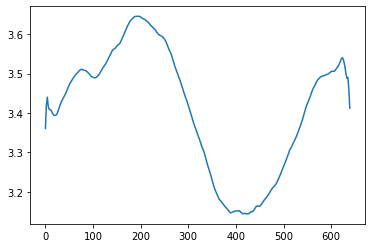

In [224]:
plt.plot(a[56])
plt.show()

In [190]:
480/426

1.1267605633802817

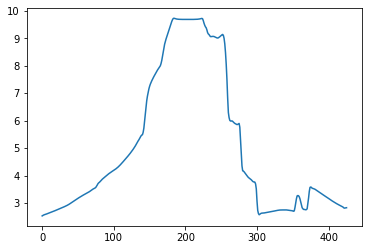

In [225]:
x=np.arange(0,480)
y=test_array[:,376]
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 480, 480/426)
ynew=f(xnew)
plt.plot(ynew)
plt.show()

### Reduce the size of depth output from 640 x 480 to 640 x 426 to maintain the aspect ratio of original RGB images

In [226]:
def shrink_array(ndarray, new_size):
    old_size=ndarray.size
    x=np.arange(0,old_size)
    y=ndarray
    f = interpolate.interp1d(x, y)
    xnew=np.arange(0,old_size,old_size/new_size)
    ynew=f(xnew)
    print("returning array with size {}".format(ynew.size))
    return ynew

In [227]:
b=np.zeros((426,640))
for i in range(0,640):
    b[:,i]=shrink_array(a[:,i],426)

returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning array with size 426
returning 

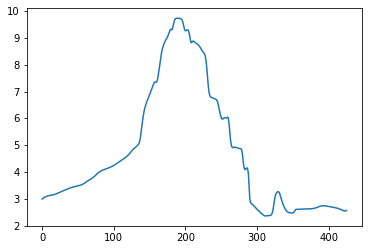

In [228]:
plt.plot(b[:,56])
plt.show()

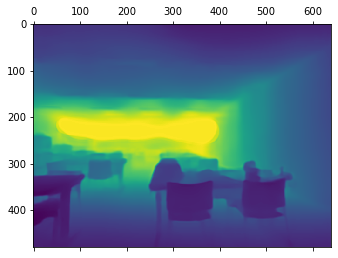

In [229]:
plt.matshow(a)

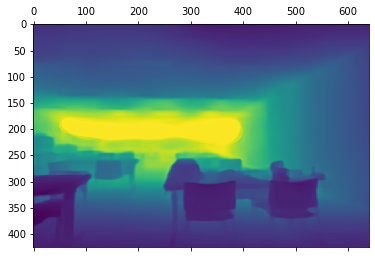

In [230]:
plt.matshow(b)

In [231]:
#np.savetxt("Data/resized_depth_array_1584.txt", b)

### Point cloud using resized (640x426) depth array

In [245]:
fx, fz = 441, 443
cx, cz = 320, 213 


# suppose your depth image is scaled by a factor of 1000
y = np.loadtxt("Data/resized_depth_array_1584.txt")
y =(-1)*y
# convert depth image of shape to point map 
# here we assume depth image is of shape (480, 640)
px, pz = np.meshgrid(np.arange(640), np.arange(426))  # pixel_x, pixel_y
px, pz = px.astype(float), py.astype(float)
x = ((px - cx) / fx) * y
z = ((pz - cz) / fz) * y 
pmap3 = np.concatenate([i[..., np.newaxis] for i in (x, y, z)], axis=-1)

print(pmap3.shape)

(426, 640, 3)


In [246]:
new_pmap3=np.reshape(pmap3, (426*640,-1))

In [247]:
np.savetxt("Data/resized_pc_1584.txt",new_pmap3)

### Coordinate axes

In [183]:
values=np.zeros(300)
x_axis=np.zeros((300,6))
y_axis=np.zeros((300,6))
z_axis=np.zeros((300,6))
for dist in range(0,300):
    values[dist]=dist/100
x_axis[:,0]=values
x_axis[:,3]=1.0
y_axis[:,1]=values
y_axis[:,4]=1.0
z_axis[:,2]=values
z_axis[:,5]=1.0
coordinate_axes=np.concatenate((x_axis,y_axis,z_axis))
#print(coordinate_axes)
#np.savetxt("Data/coord_axes.txt",coordinate_axes)

In [31]:
lidar=o3d.io.read_point_cloud("Data/lidar.txt", format='xyz')
#trajectory = o3d.io.read_point_cloud("Data/traj_cond.ply") 

In [17]:
trajectory = o3d.io.read_point_cloud("Data/test_traj.txt", format='xyz')
traj=np.loadtxt("Data/test_traj.txt")

In [59]:
len(traj)

17523

In [29]:
test_pmap1 = o3d.io.read_point_cloud("Data/resized_pc_1583.txt", format='xyz')
test_pmap2 = o3d.io.read_point_cloud("Data/resized_pc_1593.txt", format='xyz')
test_pmap3 = o3d.io.read_point_cloud("Data/resized_pc_1584.txt", format='xyz')
axes=o3d.io.read_point_cloud("Data/coord_axes.txt", format='xyzrgb')

In [32]:
test_pmap1.paint_uniform_color([1, 0, 0])
test_pmap2.paint_uniform_color([0, 1, 0])
test_pmap3.paint_uniform_color([0.5, 0, 1])
trajectory.paint_uniform_color([0, 0, 0])
o3d.visualization.draw_geometries([trajectory, axes, test_pmap3, lidar],
                                 zoom=0.01,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

In [46]:
def distance(x1,x2,y1,y2):
    return math.sqrt(((x2-x1)**2)+((y2-y1)**2))

def traj_len(traj, resolution):
    """
    traj is an array with 3 columns for x,y,z coordinates
    resolution is a positive integer defining no. of points to skip
    Calculates the length of the trajectory in the horizontal plane
    with a given resolution of no. of consecutive points along the
    trajectory
    """
    length=0
    r=resolution
    print(len(traj))
    for i in range(0, len(traj)-r, r):
        x1=traj[i][0]
        x2=traj[i+r][0]
        y1=traj[i][1]
        y2=traj[i+r][1]
        length+=distance(x1,x2,y1,y2)
        
    return length

def draw_registration_result_original_color(source, target, transformation):
    source_temp = copy.deepcopy(source)
    source_temp.transform(transformation)
    #FOR FLIPPING POINT CLOUD UPSIDE DOWN
    #source_temp.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
    #target.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
    o3d.visualization.draw_geometries([source_temp, target],
                                      zoom=0.1,
                                      front=[-0.2458, -0.8088, 0.5342],
                                      lookat=[0, 0, 0],
                                      up=[0.3109, -0.5878, -0.7468])

In [40]:
trajectory

PointCloud with 17523 points.

In [34]:
test_traj = pd.read_csv("Data/trajectory.txt",delimiter=" ", header=0, usecols=[1,2,3]) 
#np.savetxt("Data/test_traj.txt", test_traj)

In [44]:
trajectory.dimension()

3

In [81]:
length_of_traj=traj_len(traj, 100)

17523


In [61]:
print(len(traj))

17523


In [82]:
print(length_of_traj)

140.7503984436537


### Global Registration

In [33]:
def draw_registration_result(source, target, transformation='None'):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    if(transformation!='None'):
        source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target],
                                     zoom=0.01,
                                     front=[0.5,0.5,0.5],
                                     lookat=[0.1,0.1,0.1],
                                     up=[0,1,0])

In [34]:
draw_registration_result(test_pmap3, lidar)

In [35]:
def preprocess_point_cloud(pcd, voxel_size):
    print(":: Downsample with a voxel size %.3f." % voxel_size)
    pcd_down = pcd.voxel_down_sample(voxel_size)

    radius_normal = voxel_size * 2
    print(":: Estimate normal with search radius %.3f." % radius_normal)
    pcd_down.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=30))

    radius_feature = voxel_size * 5
    print(":: Compute FPFH feature with search radius %.3f." % radius_feature)
    pcd_fpfh = o3d.pipelines.registration.compute_fpfh_feature(
        pcd_down,
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_feature, max_nn=100))
    return pcd_down, pcd_fpfh

def prepare_dataset(voxel_size):
    print(":: Load two point clouds and disturb initial pose.")
    source = test_pmap3
    target = lidar
    draw_registration_result(source, target)

    source_down, source_fpfh = preprocess_point_cloud(source, voxel_size)
    target_down, target_fpfh = preprocess_point_cloud(target, voxel_size)
    return source, target, source_down, target_down, source_fpfh, target_fpfh


In [40]:
voxel_size = 0.05  # means 15cm for this dataset
source, target, source_down, target_down, source_fpfh, target_fpfh = prepare_dataset(voxel_size)

def execute_fast_global_registration(source_down, target_down, source_fpfh,
                                     target_fpfh, voxel_size):
    distance_threshold = voxel_size * 0.5
    print(":: Apply fast global registration with distance threshold %.3f" \
            % distance_threshold)
    result = o3d.pipelines.registration.registration_fast_based_on_feature_matching(
        source_down, target_down, source_fpfh, target_fpfh,
        o3d.pipelines.registration.FastGlobalRegistrationOption(
            maximum_correspondence_distance=distance_threshold))
    return result

def execute_global_registration(source_down, target_down, source_fpfh,
                                target_fpfh, voxel_size):
    distance_threshold = voxel_size * 1.5
    print(":: RANSAC registration on downsampled point clouds.")
    print("   Since the downsampling voxel size is %.3f," % voxel_size)
    print("   we use a liberal distance threshold %.3f." % distance_threshold)
    result = o3d.pipelines.registration.registration_ransac_based_on_feature_matching(
        source_down, target_down, source_fpfh, target_fpfh, True,
        distance_threshold,
        o3d.pipelines.registration.TransformationEstimationPointToPoint(False),
        3, [
            o3d.pipelines.registration.CorrespondenceCheckerBasedOnEdgeLength(
                0.9),
            o3d.pipelines.registration.CorrespondenceCheckerBasedOnDistance(
                distance_threshold)
        ], o3d.pipelines.registration.RANSACConvergenceCriteria(100000, 0.999))
    return result

:: Load two point clouds and disturb initial pose.
:: Downsample with a voxel size 0.050.
:: Estimate normal with search radius 0.100.
:: Compute FPFH feature with search radius 0.250.
:: Downsample with a voxel size 0.050.
:: Estimate normal with search radius 0.100.
:: Compute FPFH feature with search radius 0.250.


In [45]:
start = time.time()
result_fast = execute_fast_global_registration(source_down, target_down,
                                               source_fpfh, target_fpfh,
                                               voxel_size)
print("Fast global registration took %.3f sec.\n" % (time.time() - start))
print(result_fast)
draw_registration_result(source_down, target_down, result_fast.transformation)

:: Apply fast global registration with distance threshold 0.025
Fast global registration took 58.378 sec.

RegistrationResult with fitness=2.587619e-02, inlier_rmse=1.888082e-02, and correspondence_set size of 1216
Access transformation to get result.


<ipython-input-33-d70bc382a280>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(transformation!='None'):


In [44]:
start = time.time()
result_ransac = execute_global_registration(source_down, target_down,
                                            source_fpfh, target_fpfh,
                                            voxel_size)
print("Global registration took %.3f sec.\n" % (time.time() - start))
print(result_ransac)
draw_registration_result(source_down, target_down, result_ransac.transformation)

:: RANSAC registration on downsampled point clouds.
   Since the downsampling voxel size is 0.050,
   we use a liberal distance threshold 0.075.
Global registration took 31.991 sec.

RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.


<ipython-input-33-d70bc382a280>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(transformation!='None'):


In [43]:
draw_registration_result(source_down, target_down)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


### Point to Plane ICP

In [48]:
source=test_pmap3
target=lidar
current_transformation = np.identity(4)

print("2. Point-to-plane ICP registration is applied on original point")
print("   clouds to refine the alignment. Distance threshold 0.02.")

source.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
target.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

result_icp = o3d.pipelines.registration.registration_icp(
    source, target, 0.02, current_transformation,
    o3d.pipelines.registration.TransformationEstimationPointToPlane())
print(result_icp)
draw_registration_result_original_color(source, target, result_icp.transformation)

2. Point-to-plane ICP registration is applied on original point
   clouds to refine the alignment. Distance threshold 0.02.
RegistrationResult with fitness=6.425323e-02, inlier_rmse=1.178850e-02, and correspondence_set size of 17518
Access transformation to get result.
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
